# Unsupervised Machine Learning 


### K-Means

1. Introduction 
2. Algorithm 
3. Distance metric (TBC)
4. Application (TBC)

In [1]:
import numpy as np
import random
import time 

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
from sklearn import cluster
from sklearn import metrics

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

plt.style.use("seaborn")
%matplotlib inline

## 1.0 Introduction 

In supervised machine learning, samples in a data set given usually come with labels. However, we may have some data sets without labels, which means we only have input variables (X) or features without output variable (y) or labels. 

A simple comparison between supervised data and unsupervised data is shown below.

<table>
<tr style="background-color:white;">
    <td>
       <table>
            <tr>
                <td colspan="3" style="text-align:center;"> <b>Iris dataset (supervised) </b> </td>
                <td></td>
            </tr>
            <tr>
                <td>$X_1$</td>
                <td>$X_2$</td>
                <td>$Y$</td>
            </tr>
            <tr>
                <td> -2.68
                <td> 0.32 
                <td>Setosa
            </tr>
            <tr>
                <td> -2.71
                <td> -0.18
                <td> Setosa
            </tr>
            <tr>
                <td> 1.28  
                <td> 0.69    
                <td> Versicolor
            </tr>
            <tr>
                <td> 0.93  
                <td> 0.32   
                <td> Versicolor
            </tr>
            <tr>
                <td> 1.39
                <td> -0.28 
                <td> Virginica
            </tr>
        </table>
    </td>
    <td>
       <table>
            <tr>
                <td colspan="3" style="text-align:center;"> <b>Iris dataset (unsupervised) </b> </td>
                <td></td>
            </tr>
            <tr>
                <td>$X_1$</td>
                <td>$X_2$</td>
            </tr>
            <tr>
                <td> -2.68
                <td> 0.32 
            </tr>
            <tr>
                <td> -2.71
                <td> -0.18
            </tr>
            <tr>
                <td> 1.28  
                <td> 0.69    
            </tr>
            <tr>
                <td> 0.93  
                <td> 0.32   
            </tr>
            <tr>
                <td> 1.39
                <td> -0.28 
            </tr>
        </table>
    </td>
</tr>
</table>

In [2]:
iris = datasets.load_iris() #loading the iris dataset
features = iris.data #get the input data
labels = iris.target #get the responses, in this case the specie of the flowers

#Reducing the dimensionality for plotting purposes (you're gonna learn more about it in future classes)
pca = PCA(n_components=2) 
pca.fit(features)
x = pca.transform(features)

In [3]:
# This code is just to generate the plot in the next slide (Just artificially hiding from the slide)
def plot_sup_x_unsup(w,h):
    
    plt.figure(0, figsize = (w,h))
    plt.subplots_adjust(right=2.5)
    
    plt.subplot(1,2,1)
    ax = plt.gca()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.scatter(x[0:50,0], x[0:50,1], c="blue")
    plt.scatter(x[50:100,0], x[50:100,1], c="red")
    plt.scatter(x[100:150,0], x[100:150,1], c="black")
    plt.xlabel("$X_1$", fontsize = (w+h))
    plt.ylabel("$X_2$", fontsize = (w+h))
    plt.legend(iris.target_names, loc='best', fontsize=22, frameon=True)
    plt.title("Supervised", fontdict={'fontsize':2*(w+h)})
    
    plt.subplot(1,2,2)
    ax = plt.gca()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.scatter(x[:,0], x[:,1])
    plt.title("Unsupervised", fontdict={'fontsize':2*(w+h)})
    plt.xlabel("$X_1$", fontsize = (w+h))
    plt.ylabel("$X_2$", fontsize = (w+h))
    

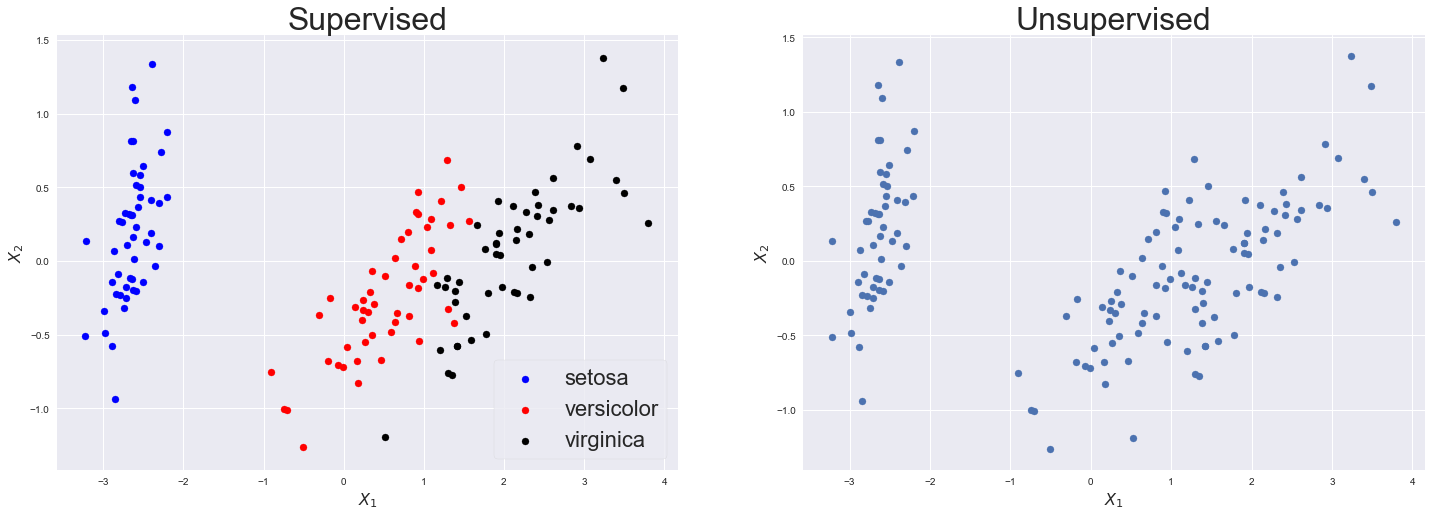

In [4]:
plot_sup_x_unsup(8,8)

How can we build a model without labels? The unsupervised machine learning will be focused on underlying structures of the inputs themselves rather than complex relation structures between input and output in supervised learning models. 

A popular method of unsupervised machine learning is clustering. It basically says that we group samples in such way that samples in the same group are as similar as possible while samples in the different group are as different as possible.

Since data sets have no labels, we are unable to calculate prediction accuracy like what we do in supervised machine learning. We aim to find the optimal clusters. What is the optimal clusters? It really depends on the problem you try to solve.

In this article, we will focus on one popular clustering algorithm, K-means that is an iterative algorithm that aims to find centroids for each group in each iteration. The centroid is used to determine the labels of the surrounding points. 

## 2.0 Algorithm 

Two inputs are key to K-means. They are the number of clusters and the position of k initial centroids for each cluster (group). The number of clusters k is usually obtained by observation (or EDA). The initial centroid can be randomly picked, but later on we will introduce some better methods to decide these start points. 

The algorithm of K-Means consists of two mains steps:
1. allocate observations to the closed centroid to form k number of clusters
2. calculate a new centroid as average of observations in each cluster

Repeat the two steps above until centroids and assignment stabilize. 

### Optional reading 

The cost function of algorithm is :

$J = \sum_{i=1}^k\sum_{j=1}^n u_{ij}||\mathbf{x}_j-\mathbf{v}_i||^2_2$, where $u_{ij}$ is 1 if the points $\mathbf{x}_j$ belongs to cluster $i$, and 0 otherwise; $\mathbf{v}_i$ is the centroid of the $i$th cluster;


You may know how to minimize a cost function via gradient descending. However we cannot use this method because the partitioning matrix ${\mathbf{U}}=[u]_{ij}$ is discrete. 

The iterative approach:
    1. Obtain the centroid;
    2. Change the partition

The function $f(\mathbf{z})=\sum_{j=1}^n ||\mathbf{x}_j-\mathbf{z}||^2_2$ is minimized at $\mathbf{z}=\mathbf{\bar{x}}$. 

OK! Let's use the iris data as an example.

#### Step 0. Pick the initial centroids.

From the unsupervised graph (pretending this is an unseen data set so that we do not that how many species they are), we observe that there are probably 2 or 3 clusters. We are going to pick three initial centroids assuming that k = 3. 

In [5]:
# RANDOM initialization (we will cover better method to choose these intial centroids)
k = 3
centroids = np.random.choice(range(0,150),size = k )
centroids = x[centroids,:]

In [6]:
# Plotting the initial centers:
def plot_intial_center(w,h, centroids):
    plt.figure(figsize=(w,h))
    plt.scatter(x[:,0], x[:,1], alpha = .35)
    plt.scatter(centroids[:,0], centroids[:,1], s=250, marker = '*', color = ['black', 'blue', 'red'])
    plt.xlabel("$X_1$", fontdict={'fontsize':w})
    plt.ylabel("$X_2$", fontdict={'fontsize':w})

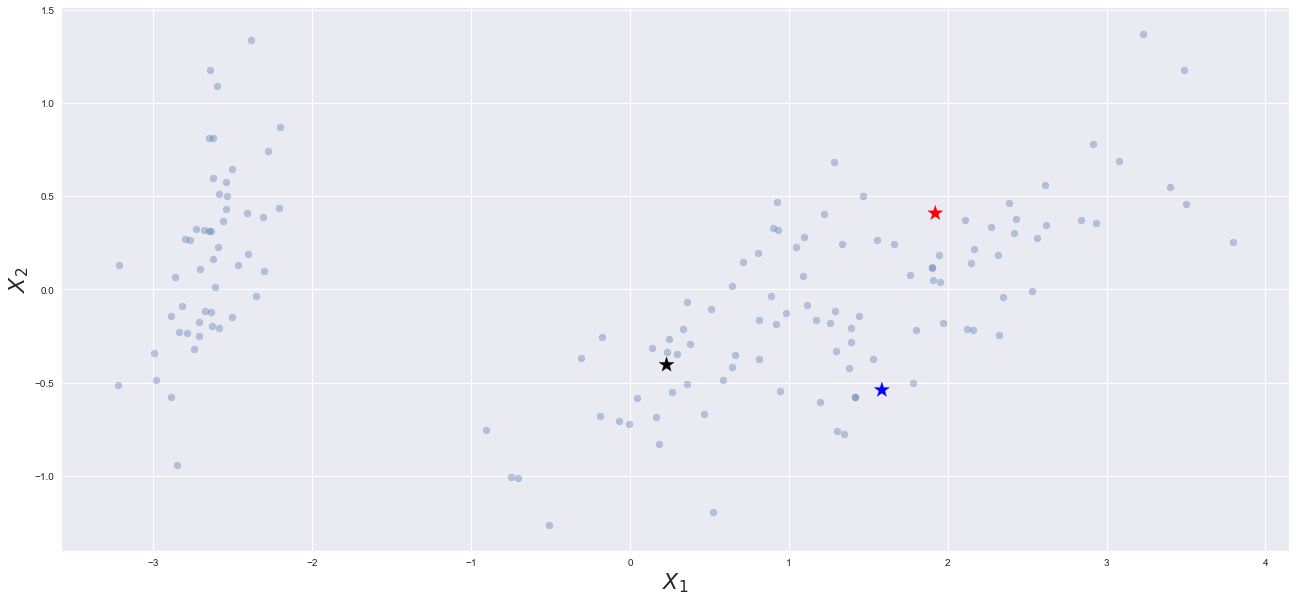

In [7]:
plot_intial_center(22,10, centroids)

#### Step 1. Calculate the distance 

We then calculate the distance of each point to each one of centroids. Let's try to calculate one point first.

In [8]:
colors = np.array(["black", 'blue', 'red'])


def plot_example_dist(w,h):
    # pick a random point 
    point = x[69,:]
    
    plt.figure(figsize=(w,h))
    plt.scatter(x[:,0],x[:,1], alpha = .35)
    plt.scatter(centroids[:,0], centroids[:,1],s=250, marker = '*', color = ['black', 'blue', 'red'])
    plt.xlabel("$X_1$", fontdict={'fontsize':w})
    plt.ylabel("$X_2$", fontdict={'fontsize':w})
    plt.scatter(point[0], point[1], c="purple", s=120)

    dist = np.zeros(3)
    for i in range(3):
        l = np.row_stack((point, centroids[i,:]))
        print(l)
        # the cost function 
        dist[i] = np.sum((point-centroids[i,:])**2)**0.5
        plt.plot(l[:,0], l[:,1], c=colors[i], linewidth=1, linestyle='-.')
        if (l[0,1] <= l[1,1]):
            plt.text(l[1,0]-.15, l[1,1]+.05, f"d = {np.round(dist[i], 2)}", 
                     color = colors[i], fontdict={'fontsize': (w+h)/2})
        else: 
            plt.text(l[1,0]-.15, l[1,1]-.11, f"d = {np.round(dist[i], 2)}", 
                     color = colors[i], fontdict={'fontsize': (w+h)/2})

    plt.title(f"This point will be assign to the {colors[np.argmin(dist)]} cluster", fontdict={'fontsize':w+h});

[[ 0.04522698 -0.58383438]
 [ 0.23054802 -0.40438585]]
[[ 0.04522698 -0.58383438]
 [ 1.58592822 -0.53964071]]
[[ 0.04522698 -0.58383438]
 [ 1.9222678   0.40920347]]


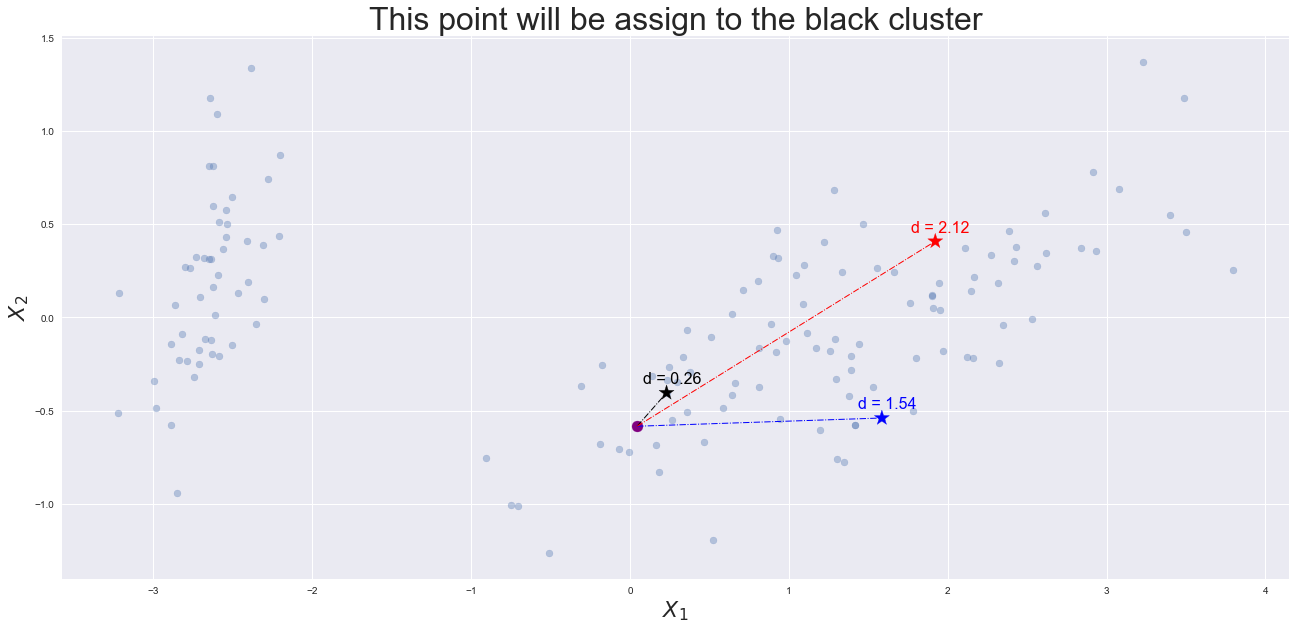

In [9]:
plot_example_dist(22,10)

As we can see from the above, the black asteroid is the closest to the point thus the point will be assign to the black cluster. We apply this to all the points.

In [12]:
# Calculate distances to each centroid return n x 3 
dist = distance.cdist(x, centroids)


def plot_first_assignment(w,h):
    plt.figure(figsize=(w,h))
    plt.scatter(x[:,0],x[:,1], c=colors[np.argmin(dist,1)], alpha=.5)
    plt.scatter(centroids[:,0], centroids[:,1],s=300, marker = '*', color = ['black', 'blue', 'red'])
    plt.xlabel("$X_1$", fontdict={'fontsize':w})
    plt.ylabel("$X_2$", fontdict={'fontsize':w})
    plt.title("First round of assignment - Step #1", fontdict={'fontsize':w+h})

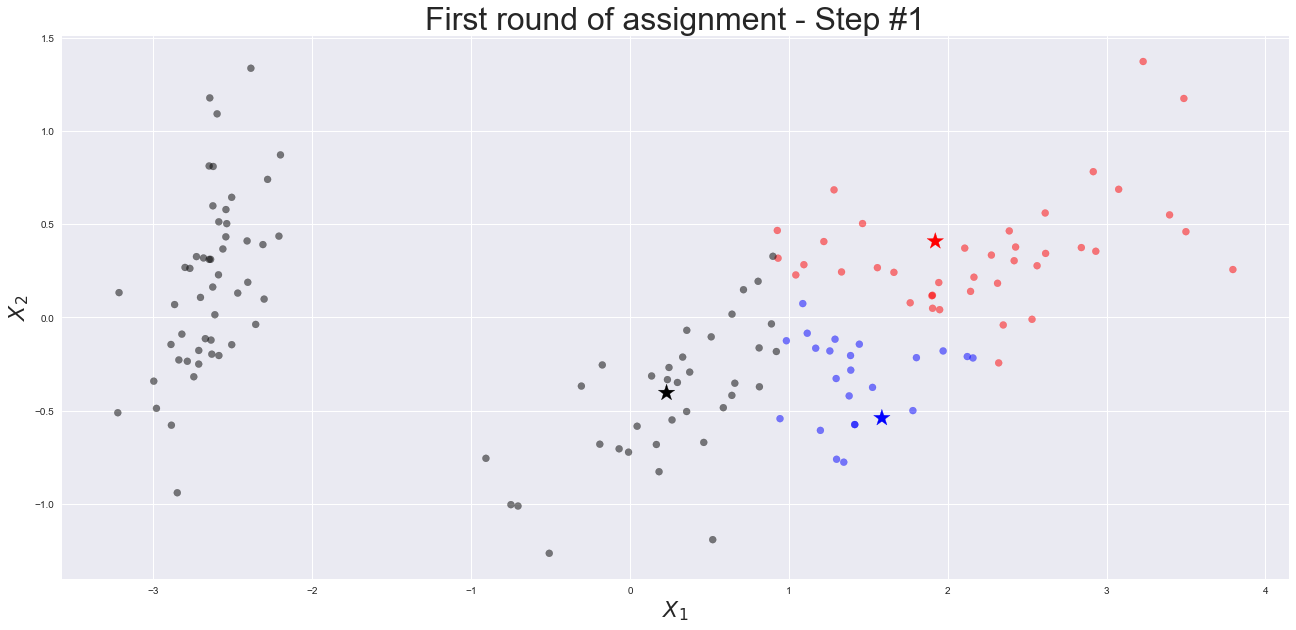

In [13]:
plot_first_assignment(22,10)

We clearly see that the graph is split into 3 clusters after the first assignment.

#### Step 2. Update centroids

In [14]:
u = np.zeros((k,x.shape[0]))
u[np.argmin(dist,axis=1), range(0,150)] = 1
new_centroids = u @ x / np.sum(u,1)[:, None]

In [21]:
def plot_update_centroid(w, h, new_centroids, centroids, dist):
    
    plt.figure(figsize=(w,h))
    plt.scatter(x[:,0],x[:,1], c=colors[np.argmin(dist,1)], alpha=.25)
    plt.scatter(centroids[:,0], centroids[:,1],s=300, marker = '*', color = ['black', 'blue', 'red'])
    plt.xlabel("$X_1$", fontdict={'fontsize':w})
    plt.ylabel("$X_2$", fontdict={'fontsize':w})
    plt.title("Update the centroids - Step #2", fontdict={'fontsize':w+h})
    plt.scatter(new_centroids[:,0], new_centroids[:,1],s=300, marker = '*', color = ['black', 'blue', 'red'])
    
    aux = new_centroids-(centroids+(new_centroids-centroids)*0.9)
    aux = np.linalg.norm(aux,axis=1)
    for i in range(0,3):
        plt.arrow(centroids[i,0], centroids[i,1], 
                  (new_centroids[i,0]-centroids[i,0])*0.8, 
                  (new_centroids[i,1]-centroids[i,1])*0.8,
                 head_width=.1, head_length=aux[i], fc=colors[i], ec=colors[i])

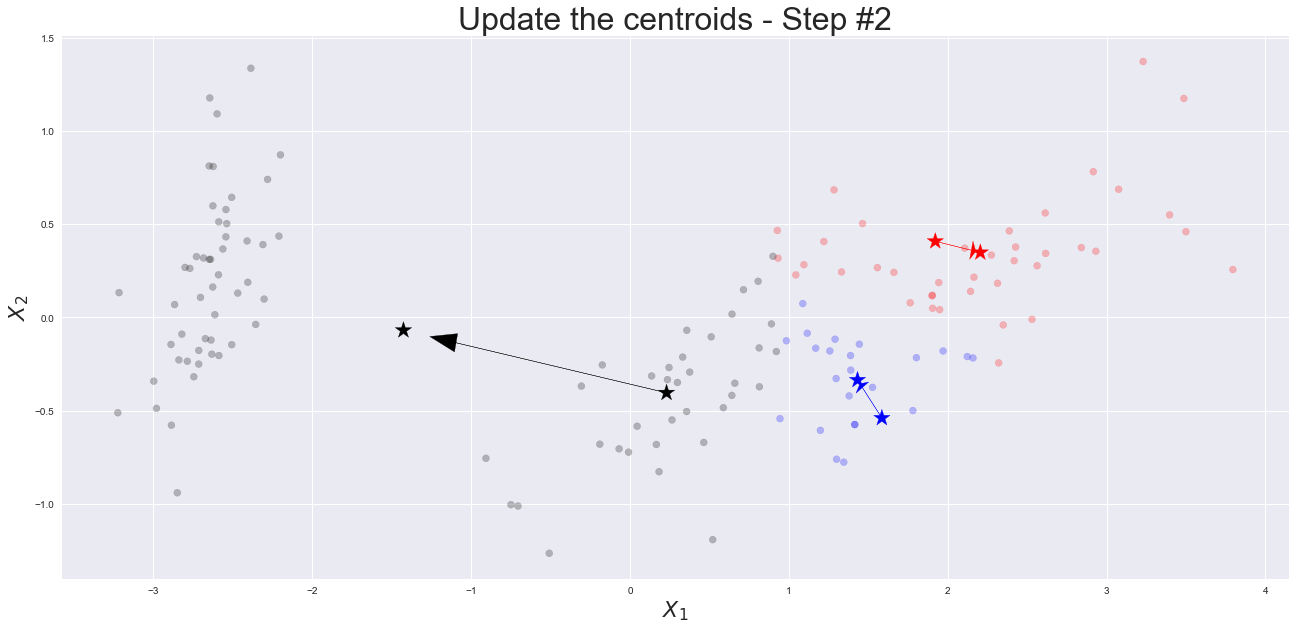

In [22]:
plot_update_centroid(22,10, new_centroids, centroids, dist)

After we complete the point assignments, we update the centroids based on the point in each cluster. The length of the arrow head represents the amount of change from the old centroid to the new one.

### Step 3. Repeat the process

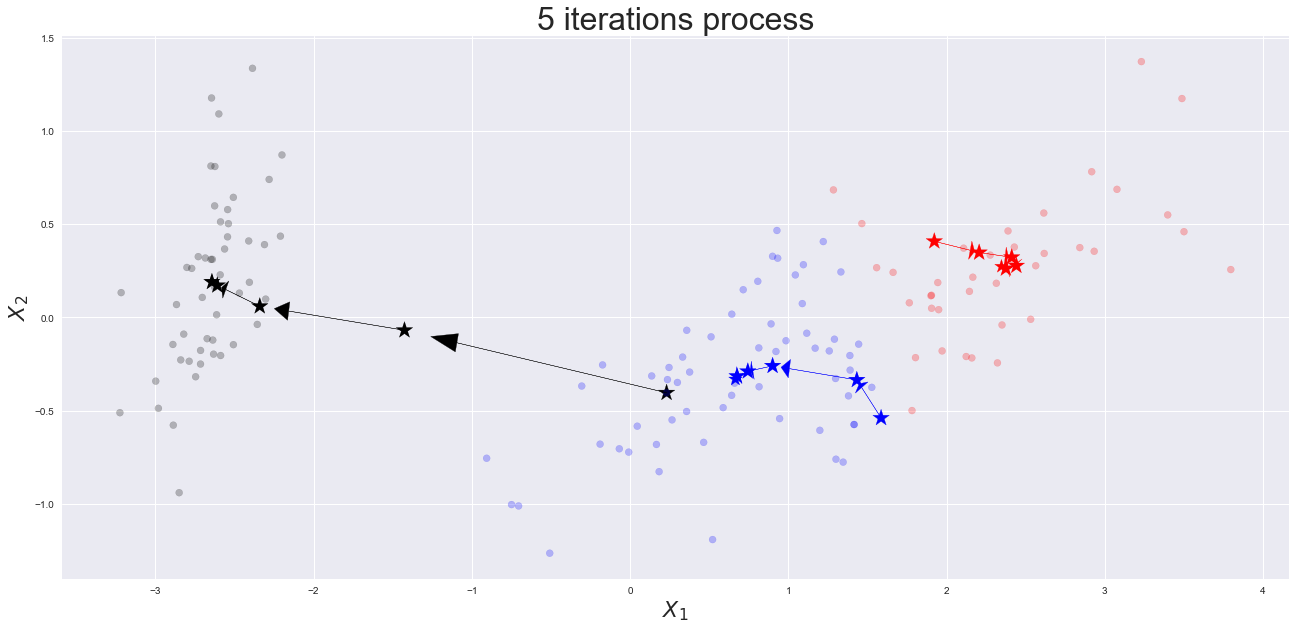

In [23]:
def plot_iterative(w,h, starting_centroid):
    
    plt.figure(figsize=(w,h))
    centroids = starting_centroid.copy()
    
    for i in range(0,5):
        
        # calculate the distance 
        dist = distance.cdist(x, centroids)
        
        # Update the centroids 
        u = np.zeros((k, x.shape[0]))
        u[np.argmin(dist,axis=1), range(0,150)] = 1
        new_centroids = u @ x / np.sum(u,1)[:, None]
        
        
        plt.scatter(centroids[:,0], centroids[:,1],s=300, marker = '*', color = ['black', 'blue', 'red'])
        plt.scatter(new_centroids[:,0], new_centroids[:,1],s=200, marker = '*', color = ['black', 'blue', 'red'])

        aux = new_centroids-(centroids+(new_centroids-centroids)*0.9)
        aux = np.linalg.norm(aux,axis=1)
        for i in range(0,3):
            if aux[i] > .005:
                plt.arrow(centroids[i,0], centroids[i,1], 
                          (new_centroids[i,0]-centroids[i,0])*0.8, 
                          (new_centroids[i,1]-centroids[i,1])*0.8,
                         head_width=.1, head_length=aux[i], fc=colors[i], ec=colors[i])
        
        centroids = new_centroids
    
    plt.scatter(x[:,0],x[:,1], c=colors[np.argmin(dist,1)], alpha=.25)
    plt.xlabel("$X_1$", fontdict={'fontsize':w})
    plt.ylabel("$X_2$", fontdict={'fontsize':w})
    plt.title("5 iterations process", fontdict={'fontsize':w+h})
    
plot_iterative(22,10, centroids)

Since we randomly choose our initial centroids, the K-means solution will be different if we pick another group of start points. Then we finish out first K-means algorithm.